In [106]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import random
import sklearn.preprocessing

In [107]:
AutoData = pd.read_csv("auto-mpg-data.csv",  header=0)

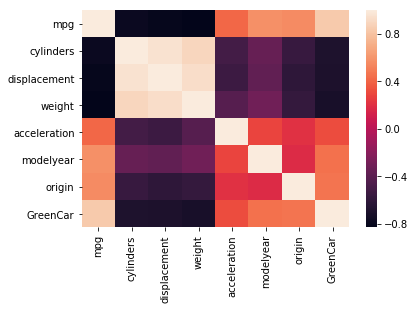

In [108]:
import seaborn as sns
corr = AutoData.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [109]:
# function for min-max normalization of stock
def normalize(x_data, y_data):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    x_data['cylinders'] = min_max_scaler.fit_transform(x_data.cylinders.values.reshape(-1,1))
    x_data['modelyear'] = min_max_scaler.fit_transform(x_data.modelyear.values.reshape(-1,1))
    y_data['mpg'] = min_max_scaler.fit_transform(y_data.mpg.values.reshape(-1,1))
    return x_data, y_data, min_max_scaler
x_data = AutoData.loc[:,['cylinders','modelyear']]
y_data = AutoData.loc[:,['mpg']]
true_cls = AutoData.loc[:,['GreenCar']]
x_data, y_data, scaler = normalize(x_data, y_data)

/Users/omsoni/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [110]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x_data, true_cls, test_size=0.20, random_state=33)
#x_tr, x_te, y_tr, y_te = train_test_split(x_data, y_data, test_size=0.20, random_state=33)

In [111]:
# Make a prediction with weights
def predictMpg(_x, bias, weights):
    mpg = bias #Bias
    #print("obs{0}".format(_x))
    for i in range(len(_x)-1):
        mpg +=  weights[i] * _x[i]
    return mpg

In [114]:
# Estimate Perceptron weights using stochastic gradient descent
def train(x,y, l_rate, n_epoch, scaler):
    weights = [0.0 for i in range(len(x[0]))]
    bias = 1.0 ;
    for epoch in range(n_epoch):
        sum_error = 0.0
        index=0
        for _x in x:
            #print("x={0},y={1}".format(_x,y[index]))
            prediction = predictMpg(_x, bias, weights)
            error = y[index] - prediction
            #print("error:", error)
            sum_error += error**2
            bias = bias + l_rate * error
            for i in range(len(_x)):
                weights[i] = weights[i] + l_rate * error * _x[i]
            #print("weights=", weights)
            index+=1
        print('>epoch=%d, lrate=%.3f, error=%.3f, obs=%.3f actualsse=%.3f' 
              % (epoch, l_rate, sum_error/len(x), len(x),scaler.inverse_transform(sum_error.reshape(-1,1))))
    return bias, weights

bias, weights = train(x_tr.values,y_tr.values, 0.01, 100,scaler)

>epoch=0, lrate=0.010, error=0.365, obs=318.000 actualsse=4370.434
>epoch=1, lrate=0.010, error=0.315, obs=318.000 actualsse=3776.226
>epoch=2, lrate=0.010, error=0.308, obs=318.000 actualsse=3693.197
>epoch=3, lrate=0.010, error=0.309, obs=318.000 actualsse=3702.902
>epoch=4, lrate=0.010, error=0.309, obs=318.000 actualsse=3700.891
>epoch=5, lrate=0.010, error=0.309, obs=318.000 actualsse=3701.127
>epoch=6, lrate=0.010, error=0.309, obs=318.000 actualsse=3701.121
>epoch=7, lrate=0.010, error=0.309, obs=318.000 actualsse=3701.113
>epoch=8, lrate=0.010, error=0.309, obs=318.000 actualsse=3701.116
>epoch=9, lrate=0.010, error=0.309, obs=318.000 actualsse=3701.116
>epoch=10, lrate=0.010, error=0.309, obs=318.000 actualsse=3701.116
>epoch=11, lrate=0.010, error=0.309, obs=318.000 actualsse=3701.116
>epoch=12, lrate=0.010, error=0.309, obs=318.000 actualsse=3701.116
>epoch=13, lrate=0.010, error=0.309, obs=318.000 actualsse=3701.116
>epoch=14, lrate=0.010, error=0.309, obs=318.000 actualsse

In [113]:
# Make a prediction with weights
def predictClass(_x, bias,weights):
    activation = bias #Bias
    for i in range(len(_x)):
        activation += weights[i] * _x[i]
    return 1 if activation >= 0 else 0  # Threashold